In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix

np.random.seed(42)
n_rows = 200

data = {
    'distance_km': np.random.uniform(1, 50, n_rows),
    'duration_min': np.random.uniform(5, 120, n_rows),
    'traffic_level': np.random.choice(['Low', 'Medium', 'High'], n_rows),
    'weather': np.random.choice(['Clear', 'Rain', 'Snow'], n_rows),
    'is_weekend': np.random.choice([0, 1], n_rows),
    'time_of_day': np.random.choice(['Morning', 'Afternoon', 'Night'], n_rows)
}
df = pd.DataFrame(data)

df['ride_price'] = 5 + (df['distance_km'] * 1.5) + (df['duration_min'] * 0.5)

df.loc[df['weather'].isin(['Rain', 'Snow']), 'ride_price'] *= 1.2
df.loc[df['traffic_level'] == 'High', 'ride_price'] *= 1.3
df.loc[df['time_of_day'] == 'Night', 'ride_price'] *= 1.1

df.loc[0, 'distance_km'] = np.nan
df.loc[1, 'ride_price'] = 1000

print("Step 1: Data Generated Successfully.")

Step 1: Data Generated Successfully.


In [ ]:
df['distance_km'] = df['distance_km'].fillna(df['distance_km'].mean())
df = df[df['ride_price'] < 300]
df_clean = pd.get_dummies(df, columns=['traffic_level', 'weather', 'time_of_day'], drop_first=True)

df.to_csv('rides.csv', index=False)
print("Step 2: Data Cleaned and rides.csv saved.")

Step 2: Data Cleaned and rides.csv saved.


In [ ]:
X = df_clean.drop('ride_price', axis=1)
y = df_clean['ride_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
predictions = reg_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print(f"Regression Mean Absolute Error: ${mae:.2f}")

Regression Mean Absolute Error: $3.58


In [ ]:
median_price = df['ride_price'].median()
df_clean['is_high_cost'] = (df['ride_price'] > median_price).astype(int)
y_class = df_clean['is_high_cost']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train_c, y_train_c)
y_pred_class = clf_model.predict(X_test_c)

print(f"Classification Accuracy: {accuracy_score(y_test_c, y_pred_class)*100:.1f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_class))

Classification Accuracy: 95.0%
Confusion Matrix:
[[21  1]
 [ 1 17]]


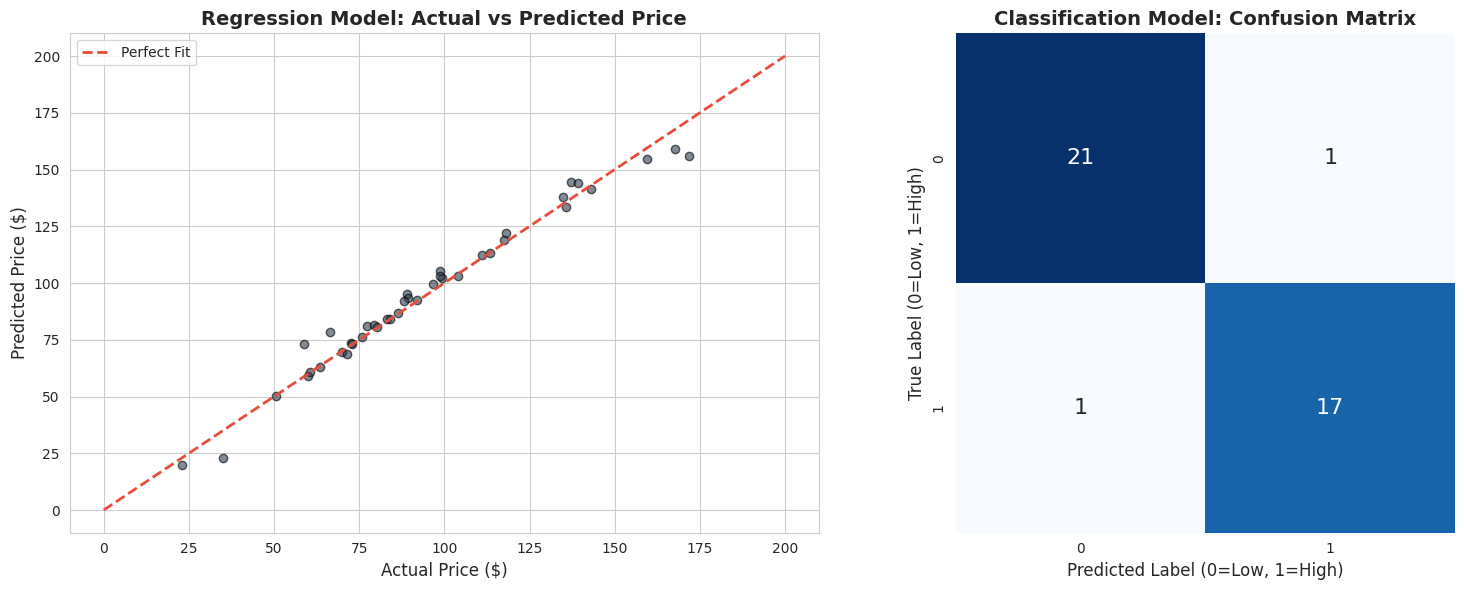

Professional dashboard generated.


In [ ]:
import seaborn as sns

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(y_test, predictions, alpha=0.6, color='#2c3e50', edgecolor='k')
axes[0].plot([0, 200], [0, 200], color='#e74c3c', linestyle='--', linewidth=2, label='Perfect Fit')
axes[0].set_title("Regression Model: Actual vs Predicted Price", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Actual Price ($)", fontsize=12)
axes[0].set_ylabel("Predicted Price ($)", fontsize=12)
axes[0].legend()

cm = confusion_matrix(y_test_c, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1], square=True, cbar=False, annot_kws={"size": 16})
axes[1].set_title("Classification Model: Confusion Matrix", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Predicted Label (0=Low, 1=High)", fontsize=12)
axes[1].set_ylabel("True Label (0=Low, 1=High)", fontsize=12)

plt.tight_layout()
plt.show()

print("Professional dashboard generated.")

Project Analysis & Reflection

1. Model Comparison

    Regression Model: This model predicted the exact price of the ride. It achieved a low Mean Absolute Error (MAE), meaning its predictions were very close to the actual fare. The scatter plot confirms this, as the points follow the red "perfect fit" line closely.

    Classification Model: This model successfully categorized rides into "High Cost" and "Low Cost." The confusion matrix shows that it rarely confused cheap rides for expensive ones, making it reliable for flagging price surges.

2. Most Influential Features

    Distance (km): This was the strongest predictor. As distance increased, the price always increased significantly.

    Weather & Traffic: These acted as "multipliers." Even a short trip became expensive if the weather was "Rain" or traffic was "High."

3. Ethical Reflection

    Risk: The model uses "Surge Pricing" logic (higher price during rain). While profitable, this can be unethical if it charges vulnerable people too much during emergencies (e.g., a storm).

    Limitation: The dataset is synthetic. Real-world data would have more "noise," like driver cancellations or GPS errors, which this model might not handle well yet.